### imports

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as tfl
import matplotlib.pyplot as plt
import pickle

import utils

## Loading Data

In [2]:
data = utils.get_data()
X_train = tf.cast(data['X_train'], dtype=tf.float32)
y_train = tf.cast(data['y_train'], dtype=tf.float32)
X_test = tf.cast(data['X_test'], dtype=tf.float32)
y_test = tf.cast(data['y_test'], dtype=tf.float32)

2022-02-01 16:29:12.672212: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-01 16:29:12.672500: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-01 16:29:12.673638: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


## NN Network

In [3]:
model = tf.keras.Sequential([
    tfl.ZeroPadding2D(padding=1, input_shape=(100, 100, 3)),

    tfl.Conv2D(50, 7, strides=1),
    tfl.BatchNormalization(axis=3),
    tfl.ReLU(),

    tfl.MaxPool2D(),

    tfl.Conv2D(100, 7, strides=1),
    tfl.BatchNormalization(axis=3),
    tfl.ReLU(),

    tfl.MaxPool2D(),
    
    tfl.Conv2D(200, 5, strides=1),
    tfl.BatchNormalization(axis=3),
    tfl.ReLU(),

    tfl.MaxPool2D(),
    tfl.Flatten(),
    tfl.Dense(10, activation='softmax')
])

In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [1]:
model.summary()

NameError: name 'model' is not defined

## Learning

In [18]:
model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
54/54 [==============================] - 89s 2s/step - loss: 4.8137 - accuracy: 0.3651
Epoch 2/10
54/54 [==============================] - 89s 2s/step - loss: 0.6687 - accuracy: 0.7980
Epoch 3/10
54/54 [==============================] - 90s 2s/step - loss: 0.3110 - accuracy: 0.8924
Epoch 4/10
54/54 [==============================] - 87s 2s/step - loss: 0.1399 - accuracy: 0.9579
Epoch 5/10
54/54 [==============================] - 89s 2s/step - loss: 0.1334 - accuracy: 0.9611
Epoch 6/10
54/54 [==============================] - 89s 2s/step - loss: 0.0862 - accuracy: 0.9728
Epoch 7/10
54/54 [==============================] - 89s 2s/step - loss: 0.0755 - accuracy: 0.9726
Epoch 8/10
54/54 [==============================] - 92s 2s/step - loss: 0.0579 - accuracy: 0.9837
Epoch 9/10
54/54 [==============================] - 91s 2s/step - loss: 0.0108 - accuracy: 0.9988
Epoch 10/10
54/54 [==============================] - 92s 2s/step - loss: 0.0319 - accuracy: 0.9879


## Testing

In [20]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 215ms/step - loss: 0.2524 - accuracy: 0.9000


[0.25244373083114624, 0.8999999761581421]

## Saving the model

In [35]:
tf.saved_model.save(model, 'model')

2022-01-31 22:06:46.015138: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model/assets


## Plot the model

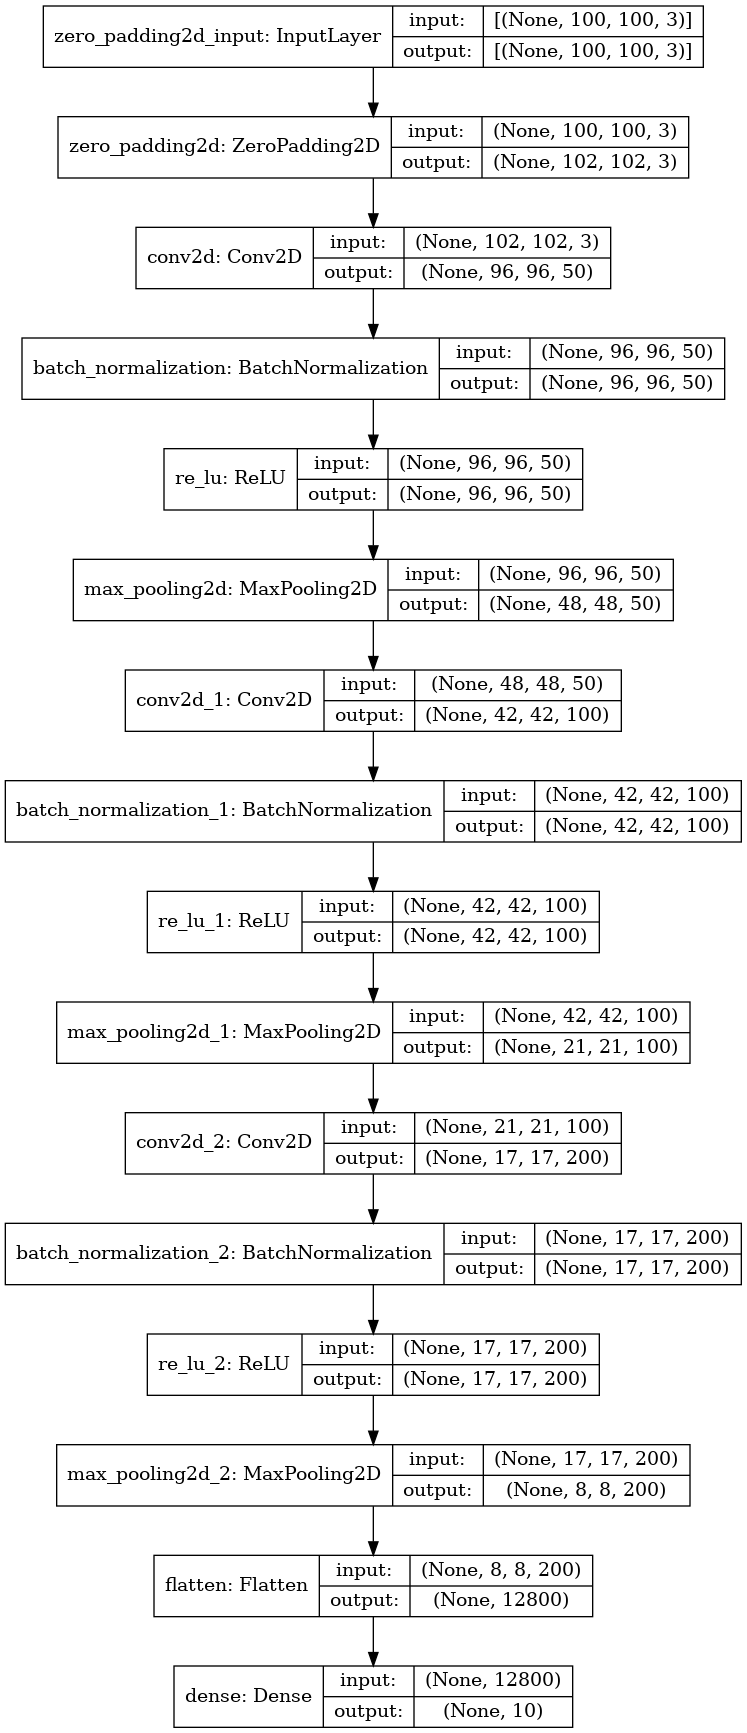

In [6]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Load the model

In [3]:
loaded_model = tf.keras.models.load_model('models/model_1.h5')

In [4]:
loaded_model.evaluate(X_test, y_test)

2022-02-01 16:30:18.309474: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-01 16:30:18.328410: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2799925000 Hz


2/2 [==============================] - 1s 282ms/step - loss: 0.2524 - accuracy: 0.9000


[0.25244373083114624, 0.8999999761581421]